In [87]:
# Import these libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Load in the following files
assessments = pd.read_csv("../Data/assessments.csv")
courses = pd.read_csv("../Data/courses.csv")
studentAssessment = pd.read_csv("../Data/studentAssessment.csv")
studentInfo = pd.read_csv("../Data/studentInfo.csv")
studentRegistration = pd.read_csv("../Data/studentRegistration.csv")
studentVle = pd.read_csv("../Data/studentVle.csv")
vle = pd.read_csv("../Data/vle.csv")

In [89]:
# Check the null count of the files
a = assessments.isna().sum()
b = courses.isna().sum()
c = studentAssessment.isna().sum()
d = studentInfo.isna().sum()
e = studentRegistration.isna().sum()
f = studentVle.isna().sum()
g = vle.isna().sum()

In [90]:
a

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [91]:
b

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [92]:
c

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [93]:
d

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [94]:
e

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [95]:
f

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [96]:
g

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [97]:
# Observe what the dataset looks like 
# We used tail to also see how many rows the file had
assessments.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [98]:
# Observe what the dataset looks like 
# We used tail to also see how many rows the file had
courses.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


In [99]:
# Observe what the dataset looks like 
# We used tail to also see how many rows the file had
studentAssessment.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


In [100]:
# Observe what the dataset looks like 
# We used tail to also see how many rows the file had
studentInfo.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [101]:
# Observe what the dataset looks like 
# We used tail to also see how many rows the file had
studentRegistration.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [102]:
# Observe what the dataset looks like 
# We used tail to also see how many rows the file had
studentVle.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [103]:
# Observe what the dataset looks like 
# We used tail to also see how many rows the file had
vle.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


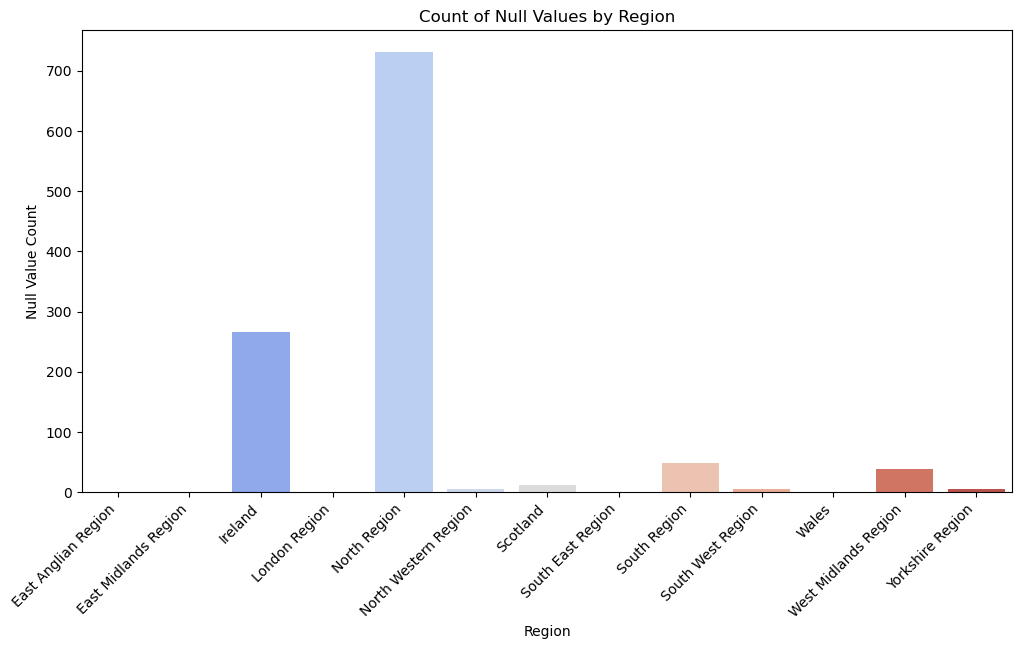

In [104]:
# Count the number of null values in each region
null_counts = studentInfo.isnull().groupby(studentInfo['region']).sum().sum(axis=1).reset_index()
null_counts.columns = ['region', 'null_count']

# Create the countplot based on null elements
plt.figure(figsize=(12, 6))
sns.barplot(
    x='region', 
    y='null_count', 
    data=null_counts, 
    palette='coolwarm',
    hue='region',  
    dodge=False  
)

# Labels for plot
plt.title('Count of Null Values by Region')
plt.xlabel('Region')
plt.ylabel('Null Value Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

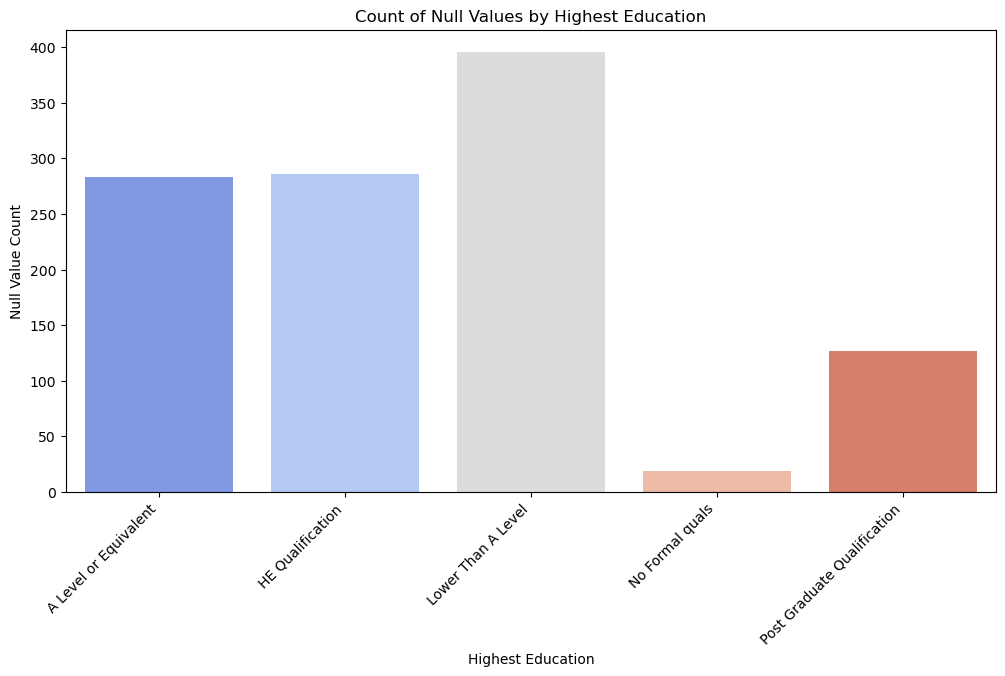

In [105]:
# Count the number of null values in each region
null_counts = studentInfo.isnull().groupby(studentInfo['highest_education']).sum().sum(axis=1).reset_index()
null_counts.columns = ['highest_education', 'null_count_he']

# Create the countplot based on null elements
plt.figure(figsize=(12, 6))
sns.barplot(
    x='highest_education', 
    y='null_count_he', 
    hue='highest_education',
    data=null_counts, 
    palette='coolwarm'
)

# Labels for plot
plt.title('Count of Null Values by Highest Education')
plt.xlabel('Highest Education')
plt.ylabel('Null Value Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


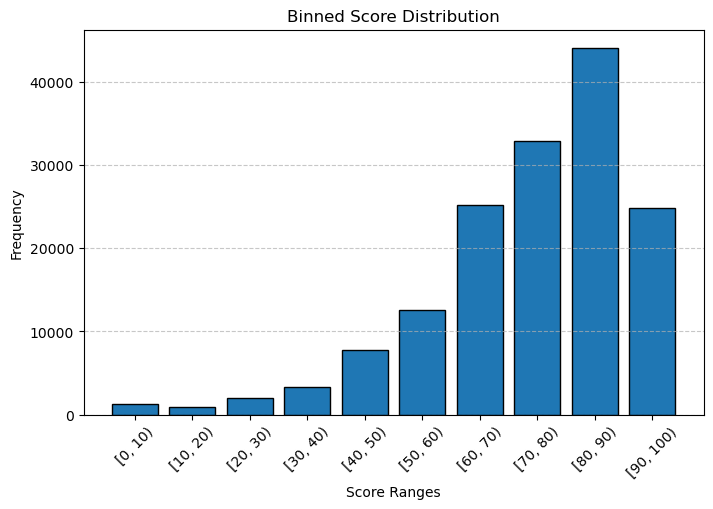

In [106]:
# Create bins for scores
bins = range(0, 101, 10)  # Bins from 0 to 100, with intervals of 10
studentAssessment['score_bins'] = pd.cut(studentAssessment['score'], bins=bins, right=False)

# Generate the binned distribution table
binned_distribution_table = studentAssessment['score_bins'].value_counts().sort_index()

# Plot the binned distribution
plt.figure(figsize=(8, 5))
plt.bar(binned_distribution_table.index.astype(str), binned_distribution_table.values, edgecolor='black')
plt.xlabel("Score Ranges")
plt.ylabel("Frequency")
plt.title("Binned Score Distribution")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [107]:
# Fill missing values in the 'score' column with the median
studentAssessment['score'] = studentAssessment['score'].fillna(studentAssessment['score'].median())


In [108]:
# Filter the dataset for imd_band '0-10%', final_result 'Fail', and highest_education 'Lower Than A Level'
fail_count = studentInfo[
    (studentInfo['imd_band'] == '0-10%') & 
    (studentInfo['final_result'] == 'Fail') & 
    (studentInfo['highest_education'] == 'Lower Than A Level')
].shape[0]

print(f"Count of 'Fail' final_result in 'imd_band' 0-10% and 'highest_education' Lower Than A Level: {fail_count}")


Count of 'Fail' final_result in 'imd_band' 0-10% and 'highest_education' Lower Than A Level: 513


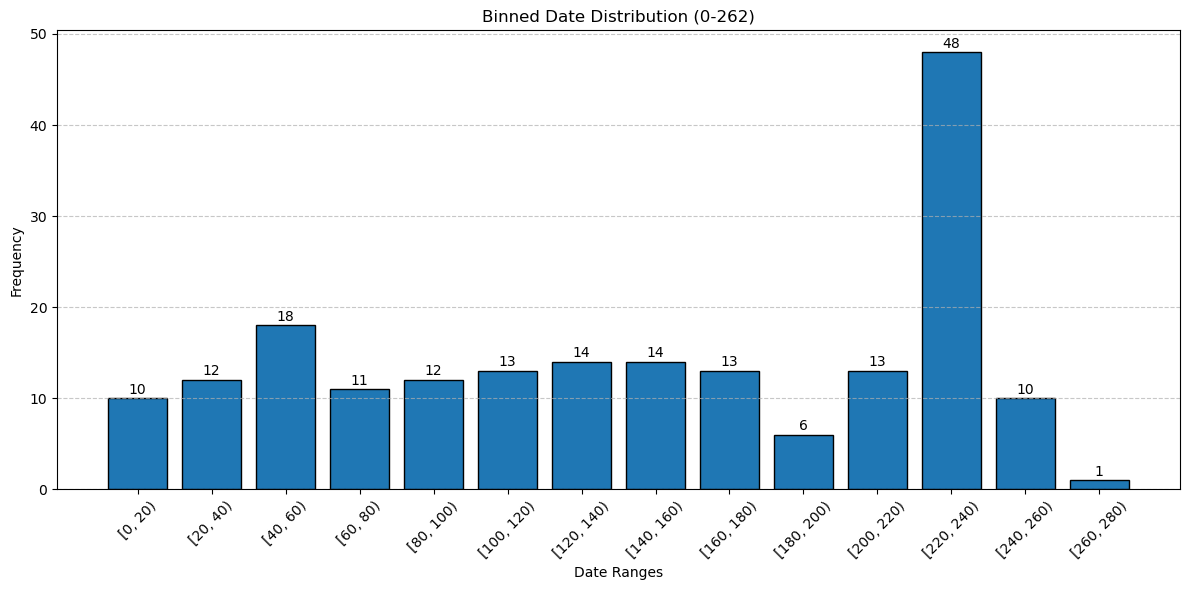

In [109]:
# Create bins with equal intervals (e.g., every 20 units)
bins = np.arange(0, 281, 20)  # Adjust the range (0-280) and step (20) as needed
assessments['score_bins'] = pd.cut(assessments['date'], bins=bins, right=False)

# Generate the binned distribution table
binned_distribution_table = assessments['score_bins'].value_counts().sort_index()

# Plot the binned distribution
plt.figure(figsize=(12, 6))  # Increased width for better readability
plt.bar(binned_distribution_table.index.astype(str), binned_distribution_table.values, edgecolor='black')

# Add text labels on top of the bars
for index, value in enumerate(binned_distribution_table.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Labels for plot
plt.xlabel("Date Ranges")
plt.ylabel("Frequency")
plt.title("Binned Date Distribution (0-262)")
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


In [110]:
# Replace missing values in 'date' with random samples
# Identify missing values
missing_indices = assessments['date'].isna()  
# Count of missing values
num_missing = missing_indices.sum()  

# Randomly sample values from the 'date' column (excluding NaNs)
random_samples = assessments['date'].dropna().sample(n=num_missing, random_state=42, replace=True)

# Assign the sampled values to the missing indices
assessments.loc[missing_indices, 'date'] = random_samples.values


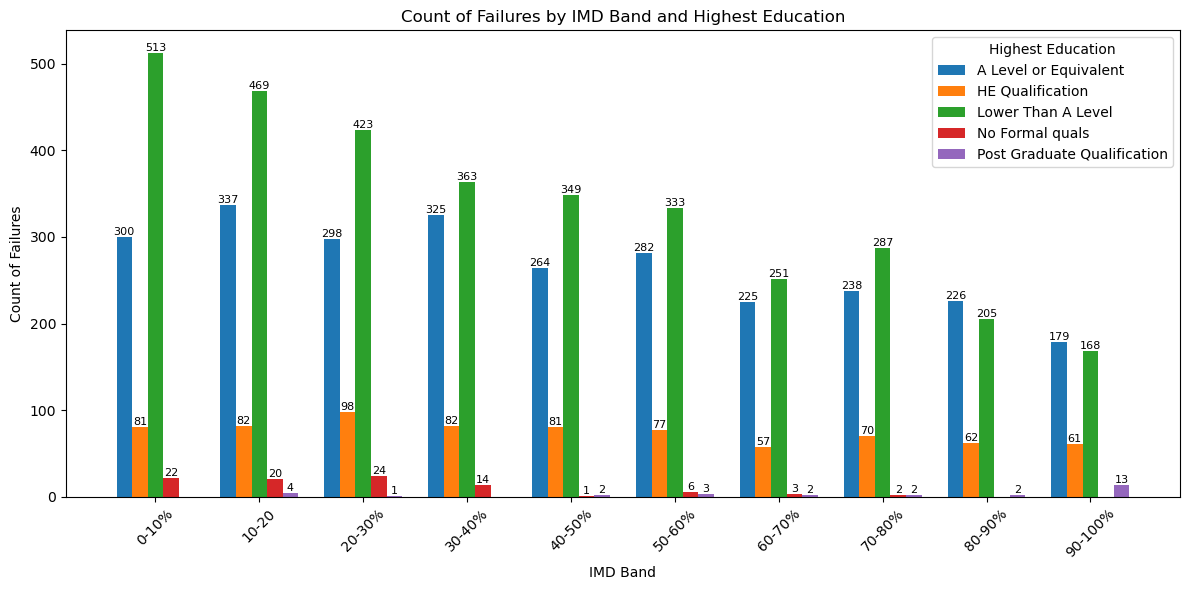

In [111]:
# Filter data for 'Fail' in the 'final_result' column
fail_data = studentInfo[studentInfo['final_result'] == 'Fail']

# Group by 'imd_band' and 'highest_education' and count the occurrences
grouped_data = fail_data.groupby(['imd_band', 'highest_education']).size().unstack(fill_value=0)

# Define IMD bands and education levels for plotting
imd_bands = grouped_data.index
education_levels = grouped_data.columns
bar_width = 0.15
x = np.arange(len(imd_bands))

plt.figure(figsize=(12, 6))

# Create grouped bars for each highest_education category
for i, education in enumerate(education_levels):
    bars = plt.bar(x + i * bar_width, grouped_data[education], width=bar_width, label=education)
    
    # Add data labels to each bar
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Only label bars with height > 0
            plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
                     ha='center', va='bottom', fontsize=8)

# Labels for plot
plt.xlabel('IMD Band')
plt.ylabel('Count of Failures')
plt.title('Count of Failures by IMD Band and Highest Education')
plt.xticks(x + bar_width * (len(education_levels) - 1) / 2, imd_bands, rotation=45)
plt.legend(title='Highest Education')
plt.tight_layout()

plt.show()



Missing values after imputing North Region and Lower Than A Level subgroup:
0

Missing values after handling all data:
0


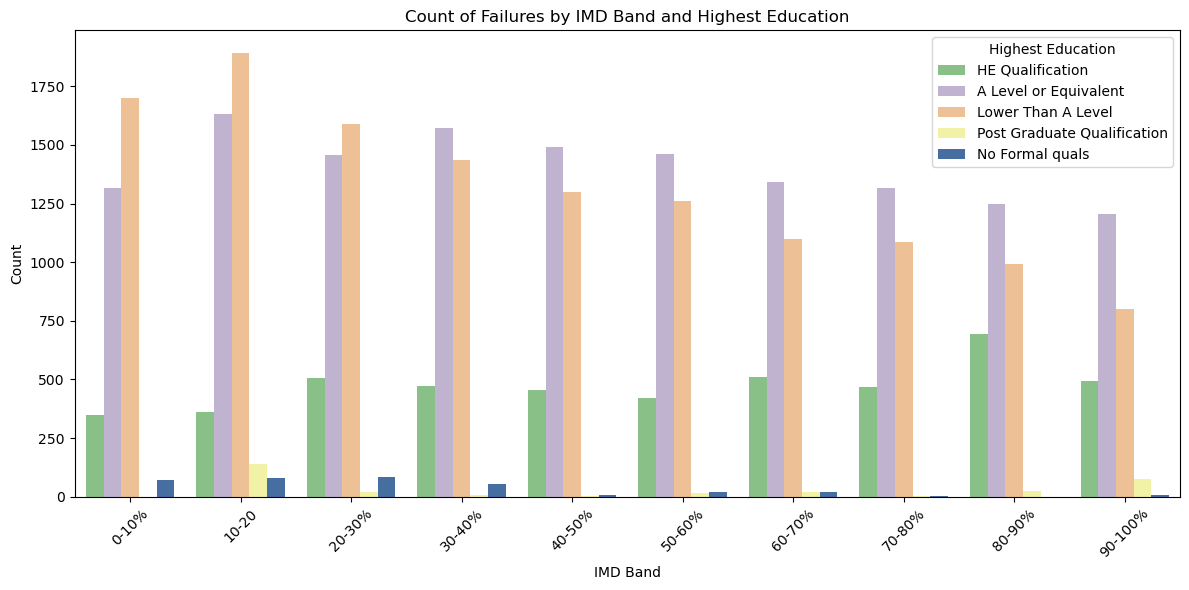

In [161]:
# Step 1: Handle missing values for North Region and Lower Than A Level subgroup
target_group = (studentInfo['region'] == 'North Region') & (studentInfo['highest_education'] == 'Lower Than A Level')

# Calculate the mode for the target subgroup
mode_value = studentInfo.loc[target_group, 'imd_band'].mode()

# Impute missing 'imd_band' values in the target group using the mode
if not mode_value.empty:
    studentInfo.loc[target_group, 'imd_band'] = studentInfo.loc[target_group, 'imd_band'].fillna(mode_value[0])

# Verify imputation for the subgroup
print("\nMissing values after imputing North Region and Lower Than A Level subgroup:")
print(studentInfo['imd_band'].isnull().sum())

# Step 2: Handle remaining missing values in 'imd_band' using group-based mode
def safe_fill_mode(x):
    mode_x = x.mode()
    # Use mode if it exists, otherwise leave values unchanged
    return x.fillna(mode_x[0] if not mode_x.empty else x.median(skipna=True))

studentInfo['imd_band'] = studentInfo.groupby(['region', 'highest_education'])['imd_band'].transform(safe_fill_mode)

# Step 3: Impute any remaining missing values globally (if any still exist)
if studentInfo['imd_band'].isnull().sum() > 0:
    overall_mode = studentInfo['imd_band'].mode()
    if not overall_mode.empty:
        studentInfo['imd_band'] = studentInfo['imd_band'].fillna(overall_mode[0])

# Verify all missing values are handled
print("\nMissing values after handling all data:")
print(studentInfo['imd_band'].isnull().sum())

# Step 4: Visualize the results
plt.figure(figsize=(12, 6))
sns.countplot(
    data=studentInfo,
    x='imd_band',
    hue='highest_education',
    palette='Accent',
    order=sorted(studentInfo['imd_band'].dropna().unique())
)
plt.title('Count of Failures by IMD Band and Highest Education')
plt.xlabel('IMD Band')
plt.ylabel('Count')
plt.legend(title='Highest Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


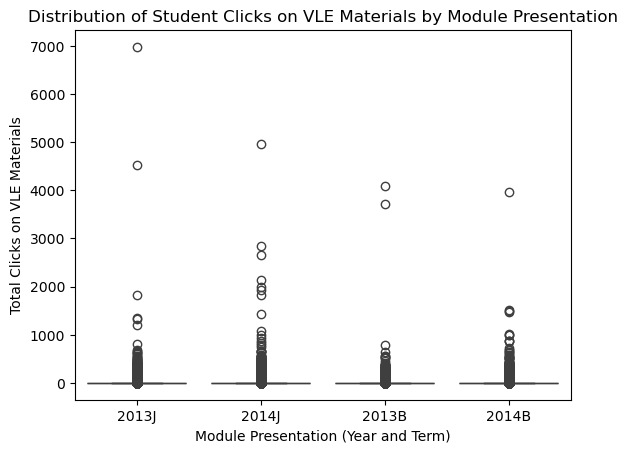

In [113]:
# Create boxplot of sum clicks using orginal dataset to compare
sns.boxplot(x="code_presentation", y="sum_click", data=studentVle)

# Labels for plot
plt.title('Distribution of Student Clicks on VLE Materials by Module Presentation')
plt.xlabel('Module Presentation (Year and Term)')
plt.ylabel('Total Clicks on VLE Materials')
plt.show()

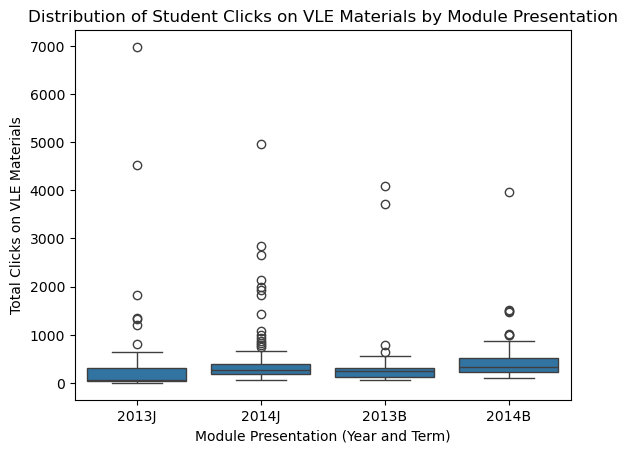

In [114]:
# Remove duplicates based on the 'sum_click' column
unique_studentVle = studentVle.drop_duplicates(subset=["sum_click"])

# Plot the boxplot using the filtered dataset
sns.boxplot(x="code_presentation", y="sum_click", data=unique_studentVle)

# Labels for plot
plt.title('Distribution of Student Clicks on VLE Materials by Module Presentation')
plt.xlabel('Module Presentation (Year and Term)')
plt.ylabel('Total Clicks on VLE Materials')
plt.show()


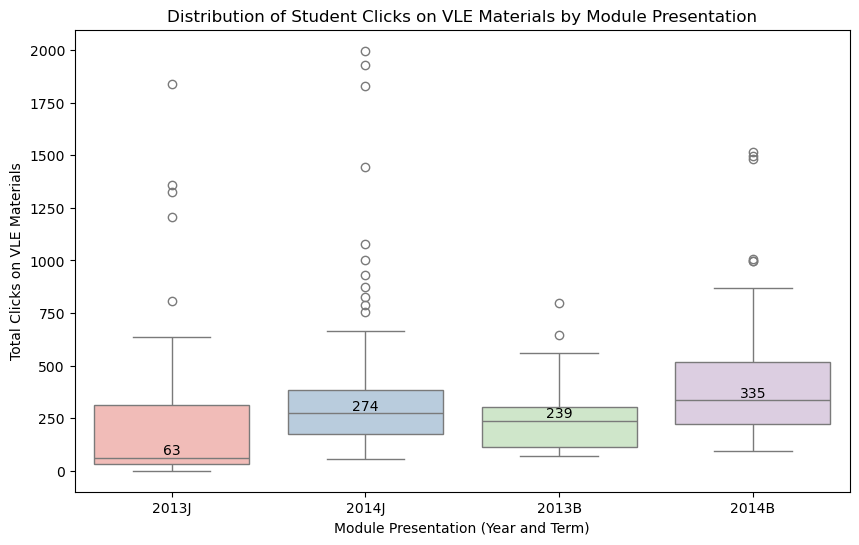

In [115]:
# Filter the dataset to include only rows with sum_click <= 3000
filtered_studentVle = unique_studentVle[unique_studentVle["sum_click"] <= 2000]

# Create the boxplot and capture the statistical data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
boxplot = sns.boxplot(x="code_presentation", y="sum_click", data=filtered_studentVle, hue="code_presentation", palette="Pastel1")

# Get the median values calculated by Seaborn
ax = plt.gca()  

# Code to generate the labels for second quartile 
for line, label in zip(ax.lines[4::6], boxplot.get_xticklabels()):
    median_y = line.get_ydata()[0]  
    x_coord = label.get_position()[0]  
    plt.text(
        x=x_coord,
        y=median_y,
        s=f'{int(median_y)}',  
        ha='center', va='bottom', color='black', fontsize=10
    )

# Labels for plot
plt.title('Distribution of Student Clicks on VLE Materials by Module Presentation')
plt.xlabel('Module Presentation (Year and Term)')
plt.ylabel('Total Clicks on VLE Materials')
plt.show()

In [116]:
#  Code to add the new Region column (based on affluence ref in IEEE) based on region
def classify_region(region):
    if region in ["London Region", "South East Region", "East Anglian Region", "South West Region"]:
        return "Affluent London Area"
    elif region in ["North Region", "North Western Region", "Yorkshire Region", "East Midlands Region", "West Midlands Region"]:
        return "Impoverished London Area"
    elif region in ["Scotland"]:
        return "Scotland"
    elif region in ["Wales"]:
        return "Wales"
    elif region in ["South Region"]:
        return "Undetermined London Area"
    else:
        return "Ireland"

studentInfo['Regions'] = studentInfo['region'].apply(classify_region)


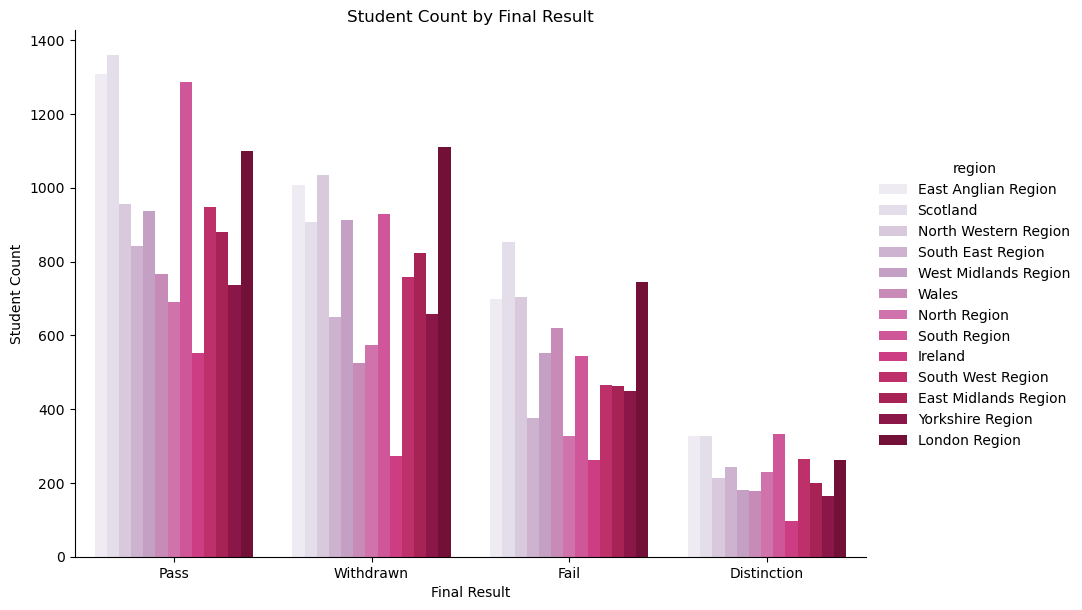

In [117]:
# Reorder the 'Region' categories
studentInfo['Regions'] = pd.Categorical(
    studentInfo['Regions'], 
    categories=[
        "Affluent London Area", 
        "Impoverished London Area", 
        "Undetermined London Area",
        "Scotland", 
        "Wales", 
        "Ireland", 
    ], 
    ordered=True
)

# Plot the grouped bar chart with the updated order
sns.catplot(
    x='final_result', 
    hue='region', 
    data=studentInfo, 
    kind='count', 
    palette='PuRd', 
    height=6, 
    aspect=1.5
)

# Labels for plot
plt.xlabel('Final Result')
plt.ylabel('Student Count')
plt.title('Student Count by Final Result')
plt.show()



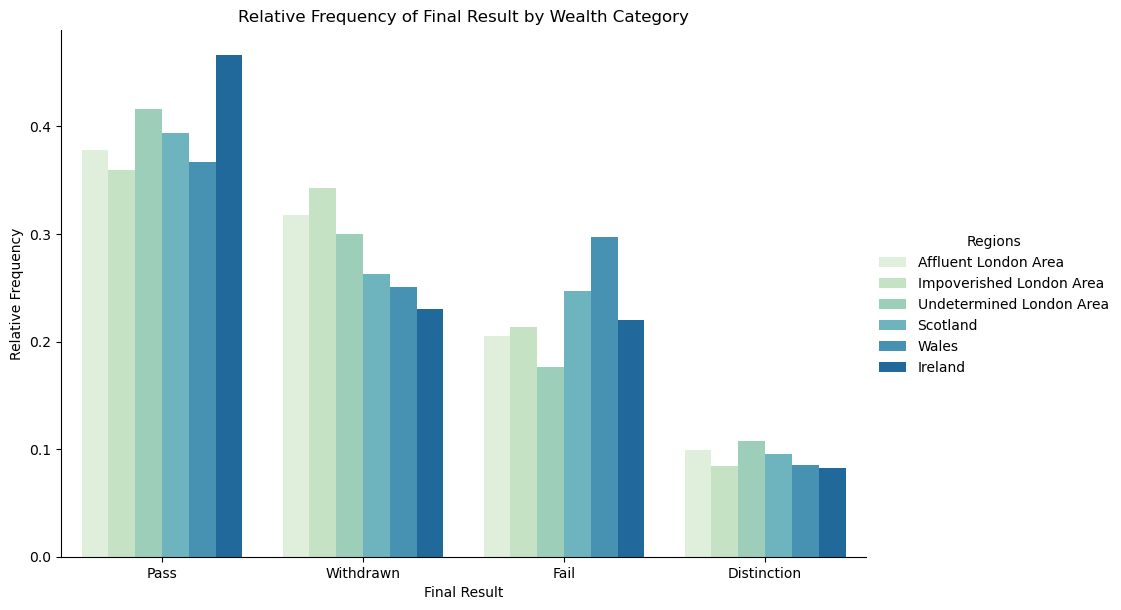

In [118]:
# Calculate relative frequency within each 'Region' category
studentInfo['Relative_Frequency'] = (
    studentInfo.groupby(['Regions', 'final_result'], observed=True)['final_result'].transform('count') /
    studentInfo.groupby('Regions', observed=True)['final_result'].transform('count')
)

# Plot the bar chart with relative frequency
sns.catplot(
    x='final_result', 
    y='Relative_Frequency', 
    hue='Regions', 
    data=studentInfo, 
    kind='bar', 
    palette='GnBu', 
    height=6, 
    aspect=1.5
)

# Labels for plot
plt.xlabel('Final Result')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Final Result by Wealth Category')
plt.show()


In [119]:
# See what null values are left
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                  0
weight                0
score_bins           11
dtype: int64

In [120]:
# See what null values are left
studentInfo.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
Regions                 0
Relative_Frequency      0
dtype: int64

In [121]:
# See what null values are left
studentAssessment.isna().sum()

id_assessment         0
id_student            0
date_submitted        0
is_banked             0
score                 0
score_bins        18986
dtype: int64

In [122]:
# Drop the columns not needed anymore
assessments.drop(columns='score_bins', inplace=True)
studentAssessment.drop(columns='score_bins', inplace=True)
studentInfo.drop(columns='Relative_Frequency', inplace=True)
studentRegistration.drop(columns='date_unregistration', inplace=True)
vle.drop(columns='week_from', inplace=True)
vle.drop(columns='week_to', inplace=True)


In [123]:
# Export the final, prepared files
assessments.to_csv('assessments.csv', index=False)
courses.to_csv('courses.csv', index=False)
studentAssessment.to_csv('studentAssessment.csv', index=False)
studentInfo.to_csv('studentInfo.csv', index=False)
studentRegistration.to_csv('studentRegistration.csv', index=False)
studentVle.to_csv('studentVle.csv', index=False)
vle.to_csv('vle.csv', index=False)
